In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import colormaps as cm

In [3]:
def line_prepender(filename, line):
    with open(filename, "r+") as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line.rstrip("\r\n") + "\n"+ "")

CASE PARAMETERS

In [4]:
U_inf = 20
rho = 1.225

XFOIL RUN

In [5]:
os.system("./clrun > log")

0

In [6]:
pol = pd.read_csv("polar_1.txt",delim_whitespace=True,on_bad_lines="skip",skiprows=[0,1,2,3,4,5,6,7,8,9,11])

In [7]:
alpha = np.array(pol["alpha"])
CL = np.array(pol["CL"])
CD = np.array(pol["CD"])

XFOIL POST - PROCESS

In [8]:
CL_a = []
CD_a = []
aoa_w = []
CL_w = []
CD_w = []
for i, a in enumerate(alpha[2:-3:]):
    CL_a.append(
        (CL[i - 2] + 8 * CL[i + 1] - 8 * CL[i - 1] - CL[i + 2])
        / (12 * (np.deg2rad(alpha[i + 1]) - np.deg2rad(alpha[i])))
    )
    CD_a.append((CD[i - 2] + 8 * CD[i + 1] - 8 * CD[i - 1] - CD[i + 2]) / (12 * (np.deg2rad(alpha[i + 1]) - np.deg2rad(alpha[i]))))
    CL_w.append(CL[i])
    CD_w.append(CD[i])
    aoa_w.append(a)

In [9]:

def op_point(aoa):
    ind = np.argmin(np.abs(aoa-alpha))
    ind_2 = np.argmin(np.abs(aoa - alpha[2:-3:]))
    return (alpha[ind], CL[ind], CD[ind],CL_a[ind_2],CD_a[ind_2])

AERODYNAMIC COEFFEICIENTS SLOPES

Text(0.5, 0, 'aoa (deg)')

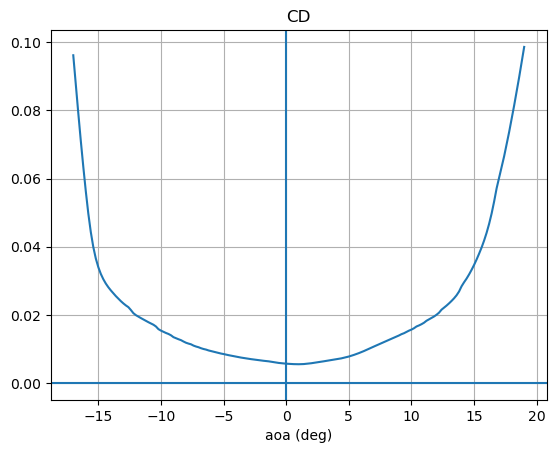

In [10]:
plt.plot(alpha,CD)
plt.axhline(0)
plt.axvline(0)
plt.grid()
plt.title("CD")
plt.xlabel("aoa (deg)")
# np.argmin(np.abs(CL))

In [11]:
aoa_w

[-16.6,
 -16.4,
 -16.2,
 -16.0,
 -15.8,
 -15.6,
 -15.4,
 -15.2,
 -15.0,
 -14.8,
 -14.6,
 -14.4,
 -14.2,
 -14.0,
 -13.8,
 -13.6,
 -13.4,
 -13.2,
 -13.0,
 -12.8,
 -12.6,
 -12.4,
 -12.2,
 -12.0,
 -11.8,
 -11.6,
 -11.4,
 -11.2,
 -11.0,
 -10.8,
 -10.6,
 -10.4,
 -10.2,
 -10.0,
 -9.8,
 -9.6,
 -9.4,
 -9.2,
 -9.0,
 -8.8,
 -8.6,
 -8.4,
 -8.2,
 -8.0,
 -7.8,
 -7.6,
 -7.4,
 -7.2,
 -7.0,
 -6.8,
 -6.6,
 -6.4,
 -6.2,
 -6.0,
 -5.8,
 -5.6,
 -5.2,
 -5.0,
 -4.8,
 -4.6,
 -4.2,
 -4.0,
 -3.8,
 -3.6,
 -3.4,
 -3.2,
 -3.0,
 -2.8,
 -2.6,
 -2.4,
 -2.2,
 -2.0,
 -1.8,
 -1.6,
 -1.4,
 -1.2,
 -1.0,
 -0.8,
 -0.6,
 -0.4,
 -0.2,
 0.0,
 0.2,
 0.4,
 0.6,
 0.8,
 1.0,
 1.4,
 1.8,
 2.0,
 2.2,
 2.4,
 2.6,
 2.8,
 3.0,
 3.4,
 3.6,
 3.8,
 4.0,
 4.2,
 4.4,
 4.6,
 4.8,
 5.0,
 5.2,
 5.4,
 5.6,
 5.8,
 6.0,
 6.2,
 6.4,
 6.6,
 6.8,
 7.0,
 7.2,
 7.4,
 7.6,
 7.8,
 8.0,
 8.2,
 8.4,
 8.6,
 8.8,
 9.0,
 9.2,
 9.4,
 9.6,
 9.8,
 10.0,
 10.2,
 10.4,
 10.6,
 10.8,
 11.0,
 11.2,
 11.4,
 11.6,
 11.8,
 12.0,
 12.2,
 12.4,
 12.6,
 12.8,
 13.0,
 13.2

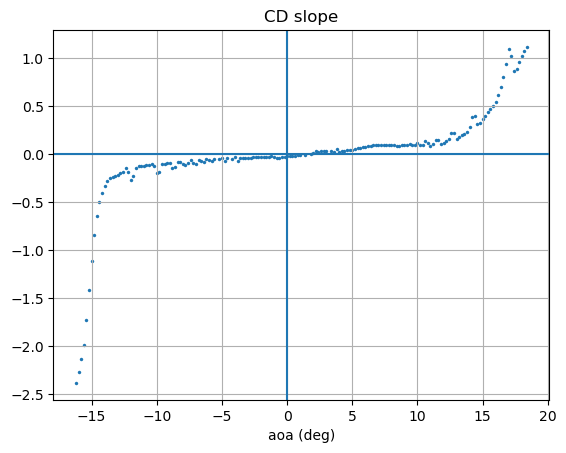

In [12]:
plt.scatter(aoa_w[2:], CD_a[2:], s=2.5, marker="x")
plt.title("CD slope")
plt.xlabel("aoa (deg)")
plt.grid()
plt.axhline(0)
plt.axvline(0)

In [13]:
aoa_w = np.array(aoa_w)
CL_w = np.array(CL_w)
CD_w = np.array(CD_w)
CL_a = np.array(CL_a)
CD_a = np.array(CD_a)

In [14]:
np.argmin(np.abs(CL_w[2:]))

70

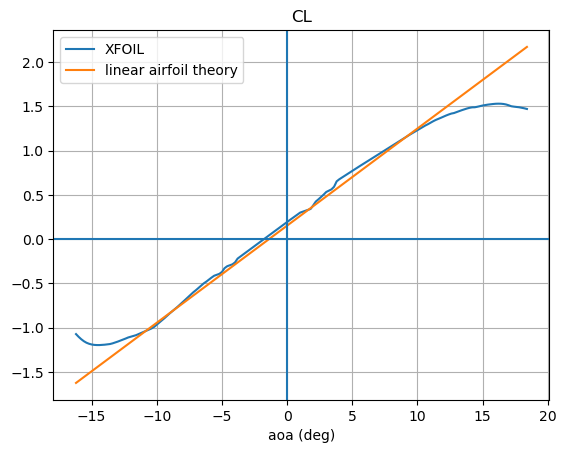

In [15]:
plt.plot(aoa_w[2:],CL_w[2:],label = "XFOIL")
plt.plot(aoa_w[2:], 2*np.pi*(np.deg2rad(aoa_w[2:])-np.deg2rad(aoa_w[2:][np.argmin(np.abs(CL_w))])),label = "linear airfoil theory")
plt.title("CL")
plt.xlabel("aoa (deg)")
plt.axhline()
plt.axvline()
plt.grid()
plt.legend()

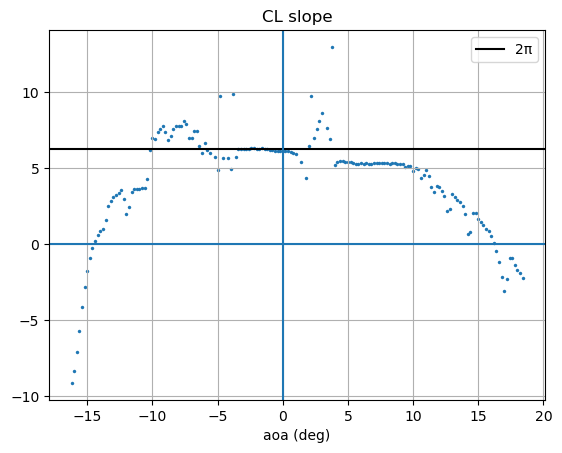

In [16]:
plt.scatter(aoa_w[2:],CL_a[2:],s=2.5,marker = 'x')
plt.title("CL slope")
plt.xlabel("aoa (deg)")
plt.grid()
plt.axhline(0)
plt.axhline(2*np.pi,label = "2π",color = "k")
plt.legend()
plt.axvline(0)
plt.show()

AEROELASTIC SYSTEM SETUP

In [17]:
aerodyn = np.vstack((aoa_w[2:],CL_w[2:],CD_w[2:],CL_a[2:],CD_a[2:])).T


In [18]:
np.savetxt("aero.txt",aerodyn,header = "aoa CL CD CL_slope CD_slope",fmt = "%lf")
line_prepender("aero.txt",f"{len(aerodyn)}")


In [19]:
def K(k_ksi,k_zeta,theta_s):
    k_xx = k_ksi * np.cos(theta_s) ** 2 + k_zeta * np.sin(theta_s) ** 2
    k_xz = -k_ksi * np.cos(theta_s) * np.sin(theta_s) + k_zeta * np.cos(theta_s) * np.sin(theta_s)
    k_zz = k_zeta * np.cos(theta_s) ** 2 + k_ksi * np.sin(theta_s) ** 2
    k_zx = k_xz
    return np.array([[k_xx,k_xz],[k_zx,k_zz]])
def C(u_dot):
    return np.zeros((2,2))
def M(m):
    return np.array([[m,0.],[0,m]])

Integration and Case Parameters Initialization

In [20]:
theta_t = 0.
theta_s = np.deg2rad(5)
aoa = 1.5
a,cl,cd,cl_a,cd_a = op_point(aoa)
L = cl*0.5*rho*U_inf**2
D = cd*0.5*rho*U_inf**2
k_zeta = 4 * np.pi**2 * 1/100
k_ksi = 2 * np.pi**2 * 1/100
mass = 50

In [21]:
integr = {
    "u_0": np.zeros(2),
    "u_dot_0": np.zeros(2),
    "u_dot_dot_0": np.zeros(2),
    "M": M(mass),
    "C": C(0),
    "K": K(k_ksi, k_zeta, theta_s),
    "Q": np.zeros(2),
    "Ntime": 1000,
    "dt": 1e-2,
    "eq_dims": 2,
}

NEWMARK FUNCTION

In [22]:
def newmark(integr_dict,gamma = 1/2,beta = 1/4):
    u = np.empty((integr_dict["Ntime"],integr_dict["eq_dims"]))
    pred = np.empty(integr_dict["eq_dims"])
    pred_dot = np.empty(integr_dict["eq_dims"])
    u_0 = integr_dict["u_0"]
    u[0]= u_0
    u_dot = np.empty((integr_dict["Ntime"],integr_dict["eq_dims"]))
    u_dot_0 = integr_dict["u_dot_0"]
    u_dot[0] = u_dot_0
    u_dot_dot = np.empty((integr_dict["Ntime"],integr_dict["eq_dims"]))
    u_dot_dot_0 = integr_dict["u_dot_dot_0"]
    u_dot_dot[0] = u_dot_dot_0
    A = np.empty((integr_dict["eq_dims"],integr_dict["eq_dims"]))
    B = np.empty((integr_dict["eq_dims"],1))

    A = (
        integr_dict["M"]
        + integr_dict["C"] * gamma * integr_dict["dt"]
        + integr_dict["K"] * beta * integr_dict["dt"] ** 2
    )
    A_inv = np.linalg.inv(A)
    # print(A)
    # print(A_inv)

    for i in range(1,integr_dict["Ntime"]):
        pred = u_0 + u_dot_0*integr_dict["dt"] + u_dot_dot_0*(0.5-beta)*integr_dict["dt"]**2
        pred_dot = u_dot_0 + u_dot_dot_0*(1-gamma)*integr_dict["dt"]

        B = (integr_dict["Q"].T - np.matmul(integr_dict["K"], pred.T)- np.matmul(integr_dict["C"], pred_dot.T))


        u_dot_dot[i] = np.matmul(A_inv,B)
     
        u[i] = pred + u_dot_dot[i]*beta*integr_dict["dt"]**2
        u_dot[i] = pred_dot + u_dot_dot[i]*gamma*integr_dict["dt"]
        u_0 = u[i]
        u_dot_0 = u_dot[i]
        u_dot_dot_0 = u_dot_dot[i]

    return u,u_dot,u_dot_dot

In [23]:
time = 16
integr["dt"] = 1e-3
integr["u_dot_0"] = np.array([1, 0])
integr["u_0"] = np.array([1, 0])
integr["u_dot_dot_0"] = np.array([0, 0])
integr["Ntime"] = int(time/integr["dt"])
# print(np.sqrt(integr["K"]/50))
integr["M"]
integr["K"]


array([[0.1988915 , 0.01713839],
       [0.01713839, 0.39328476]])

In [24]:
t = np.linspace(0,time,integr["Ntime"])


In [25]:
u,ud,udd= newmark(integr)

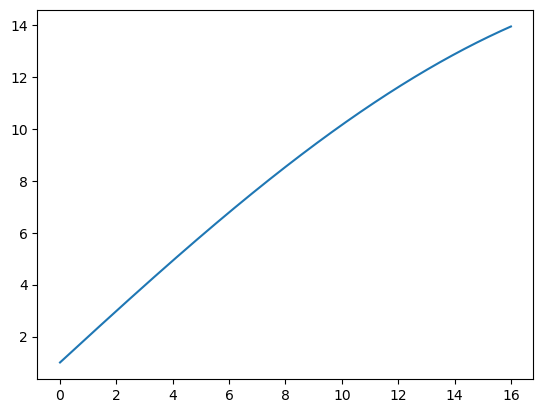

In [26]:
end = int(integr["Ntime"])*1
plt.plot(t[:end],u[:,0][:end])

In [29]:
t = np.arange(0,30-1e-4,1e-4)

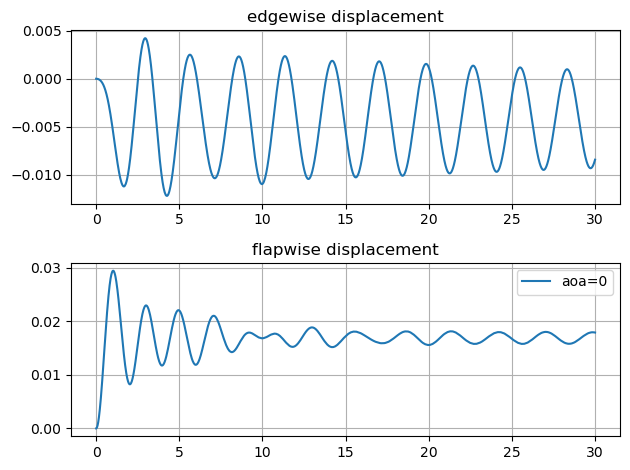

In [114]:
# aoa_s = np.deg2rad(np.linspace(0,17,5))
aoa_s = np.array([0])
# aoa_s = np.deg2rad(np.array([5]))
trajs = []
fig, (ax1, ax2) = plt.subplots(2)
for a in aoa_s:
    i = 0
    np.savetxt("set.txt",np.array([a]))
    os.system("./run > log2")
    df = pd.read_csv("traj.txt")
    f = open("eig.txt")
    con = f.readlines()
    line_1 = con[17].replace('i', 'j').split()
    line_2 = con[19].replace('i', 'j').split()
    f.close()
    omega_1 = complex(line_1[1]).imag
    omega_2 = complex(line_2[1]).imag
    if omega_1 ==0:
        print(f"0 omega_1 at {np.rad2deg(a)}deg")
    else:
        T_1 = 2*np.pi/abs(omega_1)
    if omega_2 ==0:
        print(f"0 omega_2 at {np.rad2deg(a)}deg")
    else:
        T_2 = 2*np.pi/abs(omega_2)
    maxind1 = np.argmax(np.array(df["v"]))
    maxind2 = np.argmax(np.array(df["w"]))
    t_1 = t[maxind1]
    t_2 = t[maxind2]

    colors = plt.get_cmap("turbo")((np.linspace(0,10,20)))

    ax1.plot(t,df["v"],label = f"aoa={round(np.rad2deg(a))}")
    ax1.set_title("edgewise displacement")
    ax1.grid()
    ax2.grid()
    ax2.plot(t,df["w"], label=f"aoa={round(np.rad2deg(a))}")
    ax2.set_title("flapwise displacement")
    fig.tight_layout()

    # ax1.axvline(t_1, label=f"1st eigenvalue period,a ={np.rad2deg(a)}",color = colors[i])
    # ax1.axvline(T_1+t_1, label=f"1st eigenvalue period, a ={np.rad2deg(a)}",color = colors[i])
    # i = i+5
    # ax1.axvline(t_1, label=f"2nd eigenvalue period,a ={np.rad2deg(a)}",color = colors[i])
    # ax1.axvline(T_2+t_1, label=f"2nd eigenvalue period, a ={np.rad2deg(a)}",color = colors[i])
    # i = i+5
    # ax2.axvline(t_2, label=f"1st eigenvalue period,a ={np.rad2deg(a)}",color = colors[i])
    # ax2.axvline(T_1+t_2, label=f"1st eigenvalue period, a ={np.rad2deg(a)}",color = colors[i])
    # i = i+5

    # ax2.axvline(t_2, label=f"2nd eigenvalue period,a ={np.rad2deg(a)}",color = colors[i])
    # ax2.axvline(T_2+t_2, label=f"2nd eigenvalue period, a ={np.rad2deg(a)}",color= colors[i])

    trajs.append((a,df))

plt.legend()
plt.show()

In [130]:
v= np.array(df["w"])

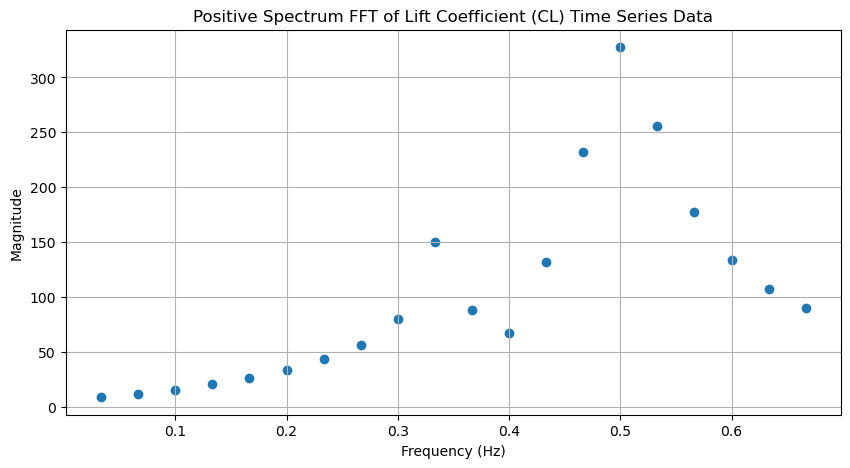

Most important frequencies:
Omega: 2.932162917226864 rad/s, Magnitude: 327.49968376446486
Omega: 3.141603125600212 rad/s, Magnitude: 255.86001120524404
Omega: 2.7227227088535164 rad/s, Magnitude: 231.9573103574915
Omega: 3.351043333973559 rad/s, Magnitude: 177.76348379052772
Omega: 1.8849618753601267 rad/s, Magnitude: 149.94364482949766


In [131]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Generate some example time series data for CL (lift coefficient)
# Replace this with your actual time series data
# Assuming a time series data stored in a numpy array named 'cl_data'
# You may need to replace this with your actual data


# Perform FFT on the time series data
fft_result = fft(v)

# Compute the frequencies
n = len(v)
freq = np.fft.fftfreq(n, d=(t[1] - t[0]))

# Get the magnitude of FFT result
magnitude = np.abs(fft_result)

# Plot the magnitude of FFT result for positive frequencies
positive_indices = (np.where(freq > 0))[0].squeeze()
plt.figure(figsize=(10, 5))
plt.scatter(freq[positive_indices][:20], magnitude[positive_indices][:20])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Positive Spectrum FFT of Lift Coefficient (CL) Time Series Data")
plt.grid(True)
plt.show()

# Find the most important frequencies
num_most_important = 5
positive_magnitude = magnitude[positive_indices]
most_important_indices = np.argsort(positive_magnitude)[::-1][:num_most_important]
most_important_frequencies = freq[most_important_indices]  # Correcting the indexing here
most_important_magnitudes = positive_magnitude[most_important_indices]

print("Most important frequencies:")
for freq, mag in zip(most_important_frequencies, most_important_magnitudes):
    print(f"Omega: {freq*(2*np.pi)} rad/s, Magnitude: {mag}")

In [108]:
positive_indices
# most_important_indices


array([     1,      2,      3, ..., 149997, 149998, 149999])

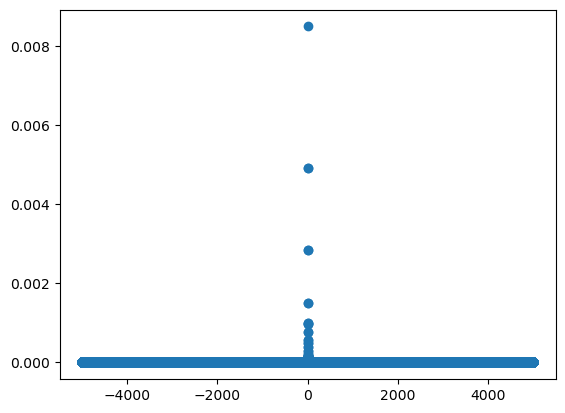

In [77]:
from scipy.fft import fft, fftfreq,rfftfreq
import numpy as np
v = np.array(df["v"])
# Number of samples in normalized_tone
N = len(v)

yf = fft(v)
xf = fftfreq(int(N),1e-4)
y_2 = np.abs(yf) / (int(N / 2))

# plt.scatte
plt.scatter(xf,np.sort(y_2)[::-1])


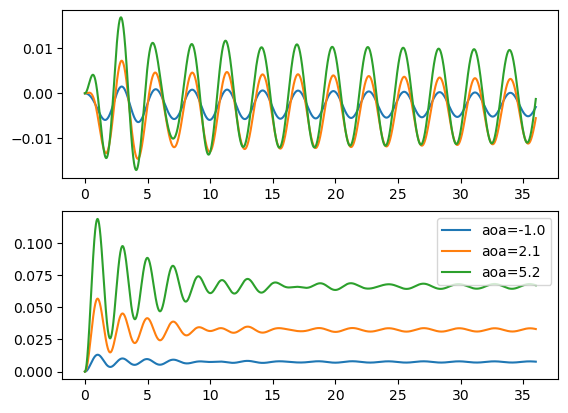

In [ ]:
# aoa_s = np.deg2rad(np.linspace(-1, 5.2, 3))
# aoa_s = np.deg2rad(np.array([5]))
trajs = []
fig, (ax1, ax2) = plt.subplots(2)
for a in aoa_s:
    i = 0
    np.savetxt("set.txt", np.array([a]))
    os.system("./run > log2")
    df = pd.read_csv("traj.txt")
    f = open("eig.txt")
    con = f.readlines()
    line_1 = con[17].replace("i", "j").split()
    line_2 = con[19].replace("i", "j").split()
    f.close()
    omega_1 = complex(line_1[1]).imag
    omega_2 = complex(line_2[1]).imag
    if omega_1 == 0:
        print(f"0 omega_1 at {np.rad2deg(a)}deg")
    else:
        T_1 = 2 * np.pi / abs(omega_1)
    if omega_2 == 0:
        print(f"0 omega_2 at {np.rad2deg(a)}deg")
    else:
        T_2 = 2 * np.pi / abs(omega_2)
    maxind1 = np.argmax(np.array(df["v"]))
    maxind2 = np.argmax(np.array(df["w"]))
    t_1 = t[maxind1]
    t_2 = t[maxind2]

    colors = plt.get_cmap("turbo")((np.linspace(0, 10, 20)))

    ax1.plot(t, df["v"], label=f"aoa={np.rad2deg(a)}")
    # ax1.title("")
    ax2.plot(t, df["w"], label=f"aoa={np.rad2deg(a)}")

    # ax1.axvline(t_1, label=f"1st eigenvalue period,a ={np.rad2deg(a)}",color = colors[i])
    # ax1.axvline(T_1+t_1, label=f"1st eigenvalue period, a ={np.rad2deg(a)}",color = colors[i])
    # i = i+5
    # ax1.axvline(t_1, label=f"2nd eigenvalue period,a ={np.rad2deg(a)}",color = colors[i])
    # ax1.axvline(T_2+t_1, label=f"2nd eigenvalue period, a ={np.rad2deg(a)}",color = colors[i])
    # i = i+5
    # ax2.axvline(t_2, label=f"1st eigenvalue period,a ={np.rad2deg(a)}",color = colors[i])
    # ax2.axvline(T_1+t_2, label=f"1st eigenvalue period, a ={np.rad2deg(a)}",color = colors[i])
    # i = i+5

    # ax2.axvline(t_2, label=f"2nd eigenvalue period,a ={np.rad2deg(a)}",color = colors[i])
    # ax2.axvline(T_2+t_2, label=f"2nd eigenvalue period, a ={np.rad2deg(a)}",color= colors[i])

    trajs.append((a, df))

plt.legend()
plt.show()

In [ ]:
T_2

2.0032984444620254